In [1]:
# !pip install shap==0.34.0


In [1]:
import pickle
import numpy as np
import pandas as pd
import catboost
from catboost import CatBoostClassifier

In [2]:
import shap

In [3]:
with open("/home/hdd1/Projects/dizziness/results/model/dizziness_trials_AUC7379_withlabFalse_200326.pkl", 'rb') as input:
    [trial]  = pickle.load(input)

In [4]:
with open("/home/hdd1/Projects/dizziness/results/model/dizziness_catboost_AUC7379_ModelXtrainXtestYtrainYtestwithlabFalse_200326.pkl", 'rb') as input:
    [gbm_model,X_train, X_test, y_train, y_test]  = pickle.load(input)

In [5]:
train_norm=pd.read_csv('/home/hdd1/Projects/dizziness/data/DizzinessTrainingset_withStandardization.csv')
test_norm=pd.read_csv('/home/hdd1/Projects/dizziness/data/DizzinessTestset_withStandardization.csv')

In [6]:
# tmp= X_train.columns
# tmp=['Systolic BP' if x=='수축기혈압' else x for x in tmp]
# tmp=['Diastolic BP' if x=='이완기혈압' else x for x in tmp]
# tmp=['Pulse' if x=='맥박' else x for x in tmp]
# display_ftname=np.array(tmp)

In [7]:
display_ftname=['Sex', 'Age', 'Presentation of dizziness', 'Hypertension', 'Diabetes', 'Smoking',  'Coronary artery disease', 'Previous stroke', 'Hyperlipidemia', 'Systolic BP', 'Diastolic BP', 'Heart rate']

In [8]:
colname=X_train.columns.tolist()

In [9]:
# X_train.columns=tmp
# X_test.columns=tmp

In [9]:
catmodel = CatBoostClassifier()
catmodel.load_model('/home/hdd1/Projects/dizziness/results/model/dizziness_catboost_AUC7379_withlabFalse_200326.cbm')

In [10]:
[catmodel.feature_names_[x] for x in  catmodel.get_cat_feature_indices()]

['Sex.M1F0',
 'dizziness',
 'Hypertension',
 'Diabetes',
 'smoking',
 'coronary.artery.disease',
 'previous.stroke',
 'Hyperlipidemia']

In [12]:
# X_train.iloc[:,catmodel.get_cat_feature_indices()] = X_train.iloc[:,catmodel.get_cat_feature_indices()].apply(lambda x : x.astype('category'))
# X_test.iloc[:,catmodel.get_cat_feature_indices()] = X_test.iloc[:,catmodel.get_cat_feature_indices()].apply(lambda x : x.astype('category'))

In [13]:
bestpram=trial.best_trial['result']['params']

In [14]:
bestpram['iterations']=trial.best_trial['result']['n_estimators']

In [15]:
# bestpram['task_type']='CPU'

In [16]:
bestpram

{'bagging_temperature': 0.32530160687572895,
 'class_weights': (1, 9.98611111111111),
 'l2_leaf_reg': 9.79886531649734,
 'learning_rate': 0.0010353655408787518,
 'loss_function': 'Logloss',
 'random_strength': 2.0,
 'task_type': 'CPU',
 'iterations': 3607}

In [83]:
from catboost import Pool
train_pool = Pool(X_train, y_train, cat_features=catmodel.get_cat_feature_indices())
test_pool = Pool(X_test, y_test, cat_features=catmodel.get_cat_feature_indices())

In [18]:
X_train.columns

Index(['Sex.M1F0', 'age', 'dizziness', 'Hypertension', 'Diabetes', 'smoking',
       'coronary.artery.disease', 'previous.stroke', 'Hyperlipidemia', '수축기혈압',
       '이완기혈압', '맥박'],
      dtype='object')

In [22]:
print(X_train.shape)
print(X_test.shape)

(3164, 12)
(1317, 12)


In [180]:
predictions_probs_gbm = catmodel.predict_proba(X_test)

In [181]:
predictions_probs_gbm_train = catmodel.predict_proba(X_train)

0.7379952820758866


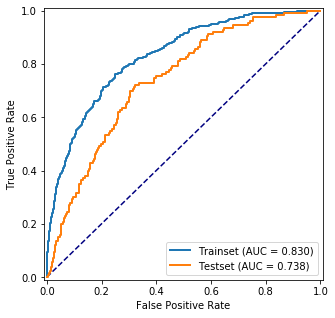

In [26]:
import datetime
from sklearn.metrics import roc_curve, auc
fig_size=(5,5)
date=datetime.datetime.now().strftime("%y%m%d")

#GET ROC DATA
fpr1, tpr1, thresholds1 = roc_curve(y_train, predictions_probs_gbm_train[:,1])
fpr, tpr, thresholds = roc_curve(y_test, predictions_probs_gbm[:,1])
roc_auc1 = auc(fpr1, tpr1)
roc_auc = auc(fpr, tpr)
print(roc_auc)
#GRAPH DATA
plt.figure(figsize=fig_size)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
# plt.title('ROC curve')
plt.plot(fpr1, tpr1, lw=2, label='%s (AUC = %0.3f)' %('Trainset', roc_auc1))
plt.plot(fpr, tpr,  lw=2, label='%s (AUC = %0.3f)' %('Testset', roc_auc))
plt.legend(loc="lower right")
plt.savefig('/home/hdd1/Projects/dizziness/results/ROC_curve_200326.jpeg', dpi=600, format='jpeg',
        transparent=False, bbox_inches=None, pad_inches=0.1)

0.7379952820758866


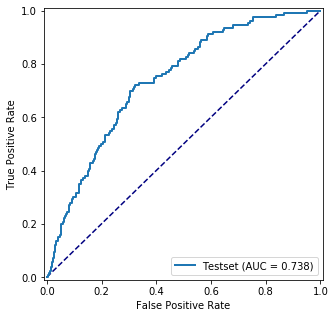

In [27]:

#GET ROC DATA
fpr, tpr, thresholds = roc_curve(y_test, predictions_probs_gbm[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)
#GRAPH DATA
plt.figure(figsize=fig_size)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
# plt.title('ROC curve')
# plt.plot(fpr1, tpr1, lw=2, label='%s (AUC = %0.3f)' %('Trainset', roc_auc1))
plt.plot(fpr, tpr,  lw=2, label='%s (AUC = %0.3f)' %('Testset', roc_auc))
plt.legend(loc="lower right")
plt.savefig('/home/hdd1/Projects/dizziness/results/ROC_curve_testset_200326.jpeg', dpi=600, format='jpeg',
        transparent=False, bbox_inches=None, pad_inches=0.1)

Average precision-recall score: 0.20


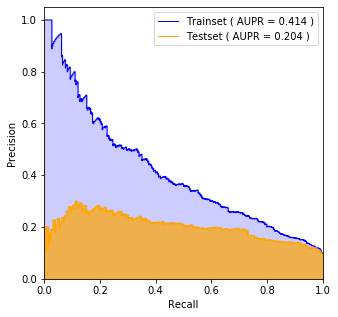

In [28]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
from sklearn.metrics import average_precision_score
average_precision1 = average_precision_score(y_train, predictions_probs_gbm_train[:,1])
average_precision = average_precision_score(y_test, predictions_probs_gbm[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y_test, predictions_probs_gbm[:,1])
precision1, recall1, _ = precision_recall_curve(y_train, predictions_probs_gbm_train[:,1])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(figsize=(5,5))
plt.step(recall1, precision1,lw=1, color='b', alpha=1, label='%s ( AUPR = %0.3f )' %('Trainset', average_precision1),
         where='post')
plt.fill_between(recall1, precision1, alpha=0.2, color='b', **step_kwargs)
plt.step(recall, precision, lw=1, color='orange', alpha=1, label='%s ( AUPR = %0.3f )' %('Testset', average_precision),
         where='post')
plt.fill_between(recall, precision, alpha=0.7, color='orange', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="upper right")
plt.savefig('/home/hdd1/Projects/dizziness/results/PR_curve_200326.jpeg', dpi=600, format='jpeg',
        transparent=False, bbox_inches=None, pad_inches=0.1)

### SHAP TreeExplainer

In [67]:
explainer_cat = shap.TreeExplainer(catmodel)
expected_value = explainer_cat.expected_value

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [84]:
shap_values_cat = explainer_cat.shap_values(train_pool)

In [246]:
explainer_cat.expected_value

-2.4886482451811682

In [97]:
shap_interaction_values = catmodel.get_feature_importance(train_pool, type='Interaction',prettified=True)

In [46]:
display_ftname

['Sex',
 'Age',
 'Presentation of dizziness',
 'Hypertension',
 'Diabetes',
 'Smoking',
 'Coronary artery disease',
 'Previous stroke',
 'Hyperlipidemia',
 'Systolic BP',
 'Diastolic BP',
 'Heart rate']

In [36]:
shap_interaction_values

,First Feature Index,Second Feature Index,Interaction
0,9,10,7.689241
1,1,9,7.169437
2,1,11,7.121472
3,1,10,7.023626
4,9,11,6.781990
5,10,11,6.067146


In [38]:
# shap_values_test =catmodel.get_feature_importance(test_pool, type='ShapValues',prettified=True)
# shap_values_test = shap_values_test.values[:,:-1]
shap_values_test = explainer.shap_values(test_pool)

### force_plot

In [41]:
explainer_cat.expected_value

-2.4886482451811682

In [43]:
pd.DataFrame([display_ftname,(shap_values[10,:])])

,0,1,2,3,4,5,6,7,8,9,10,11
0,Sex,Age,Presentation of dizziness,Hypertension,Diabetes,Smoking,Coronary artery disease,Previous stroke,Hyperlipidemia,Systolic BP,Diastolic BP,Heart rate
1,0.347898,-0.0462825,0.315286,0.0295398,-0.042965,-0.00929132,-0.0109551,-0.0676033,-0.00852353,0.0368197,-0.00701454,-0.029531


[0.93883825 0.06116175]
0


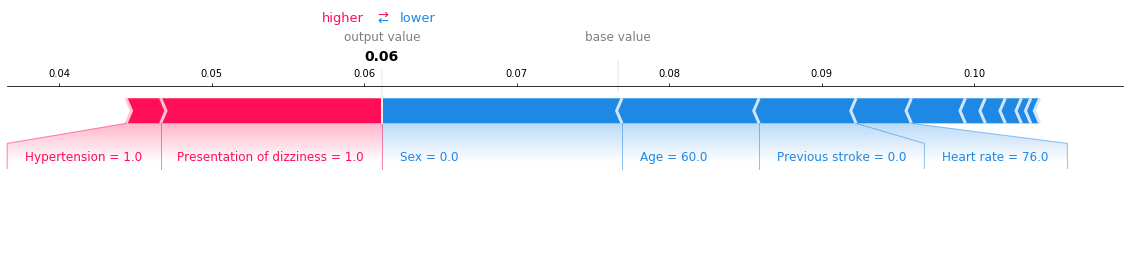

In [47]:
datidx=306
print(predictions_probs_gbm[datidx])
print(y_test.iloc[datidx])
shap.force_plot(explainer.expected_value, shap_values_test[datidx,:], X_test.iloc[datidx,:], 
                matplotlib=True, 
                link="logit", 
                feature_names=display_ftname)

In [48]:
# clustering
# shap.force_plot(explainer.expected_value, shap_values, X_train)

## shap_interaction

In [49]:
# shap_interaction_values = explainer.shap_interaction_values(X_test,y_test)

### decision_plot

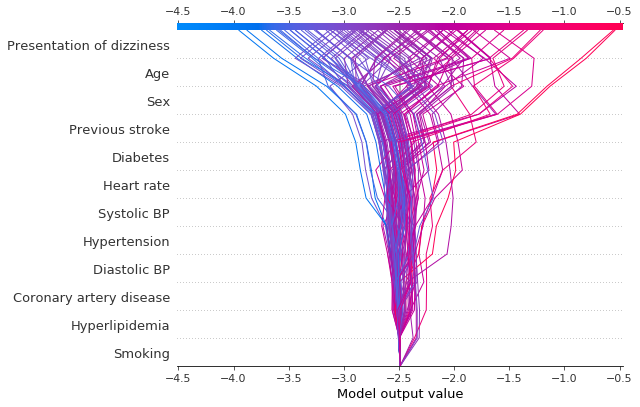

In [50]:
# shap.decision_plot(expected_value, shap_interaction_values, feature_names=display_ftname,ignore_warnings=True) ## error in shap_interaction_values.. T_T
shap.decision_plot(expected_value, shap_values[:100,:], feature_names=display_ftname, ignore_warnings=True, 
#                    link="logit"
                  ) 

In [51]:
# shap.decision_plot(expected_value, shap_values, features_display) ## expected_value.. T_T


### dependence_plot

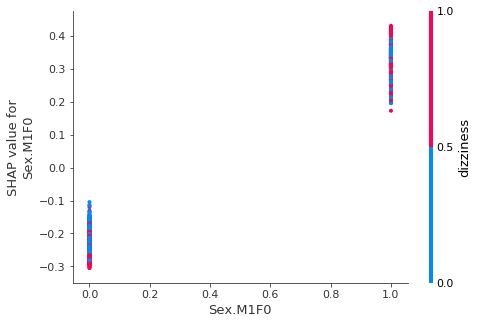

In [52]:
shap.dependence_plot("rank(1)",  shap_values, X_train, interaction_index="rank(0)")

In [53]:
X_train.columns[shap.approximate_interactions("age", shap_values, X_train)]

Index(['Sex.M1F0', 'previous.stroke', 'Hyperlipidemia', 'Diabetes', 'smoking',
       'coronary.artery.disease', 'dizziness', '이완기혈압', '수축기혈압',
       'Hypertension', '맥박', 'age'],
      dtype='object')

In [40]:
from matplotlib.axes import Axes


In [41]:
import matplotlib.pyplot as plt


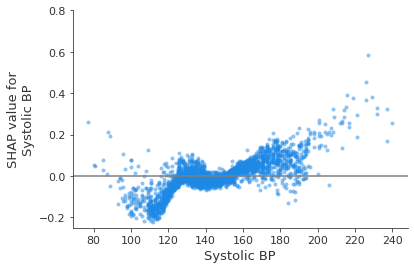

In [52]:
intvar="Systolic BP"
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylim(-0.25, 0.8)
ax.axhline(y=0,color='grey')
shap.dependence_plot(intvar,  shap_values, X_train, alpha=0.5,  interaction_index=None,
                     feature_names=display_ftname, show=False,ax=ax )
plt.savefig(f'/home/hdd1/Projects/dizziness/results/shap_values_{intvar}_200708.jpeg', dpi=600, format='jpeg',
        transparent=False, bbox_inches='tight', pad_inches=.1)
# shap_dependence_plot ( (i, j), shap_interaction_values, X )
# plotly_fig = tls.mpl_to_plotly(mpl_fig)

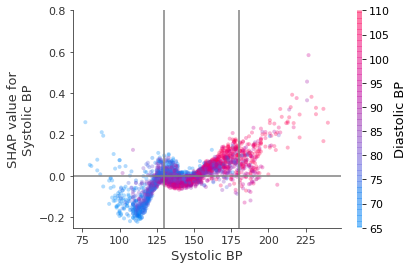

In [85]:
intvar="Systolic BP"
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylim(-0.25, 0.8)
ax.axhline(y=0,color='grey')
ax.axvline(x=130,color='grey')
ax.axvline(x=180,color='grey')
shap.dependence_plot(intvar,  shap_values, X_train, interaction_index='Diastolic BP', alpha=0.3,
                     feature_names=display_ftname, show=False,ax=ax )

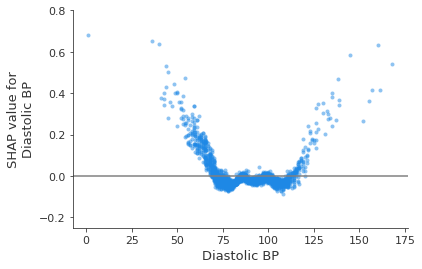

In [51]:
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylim(-0.25, 0.8)
ax.axhline(y=0,color='grey')
intvar="Diastolic BP"
shap.dependence_plot(intvar,  shap_values, X_train,alpha=0.5, interaction_index=None,
                     feature_names=display_ftname, show=False,ax=ax )
plt.savefig(f'/home/hdd1/Projects/dizziness/results/shap_values_{intvar}_200708.jpeg', dpi=600, format='jpeg',
        transparent=False, bbox_inches='tight', pad_inches=.1)

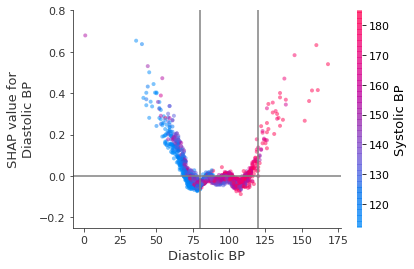

In [84]:
intvar="Diastolic BP"
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylim(-0.25, 0.8)
ax.axhline(y=0,color='grey')
ax.axvline(x=80,color='grey')
ax.axvline(x=120,color='grey')
shap.dependence_plot(intvar,  shap_values, X_train, interaction_index='Systolic BP', alpha=0.5,
                     feature_names=display_ftname, show=False,ax=ax )

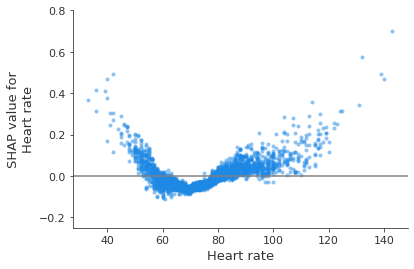

In [50]:
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylim(-0.25, 0.8)
ax.axhline(y=0,color='grey')
intvar="Heart rate"
shap.dependence_plot(intvar,  shap_values, X_train, alpha=0.5, interaction_index=None,
                     feature_names=display_ftname, show=False,ax=ax )
plt.savefig(f'/home/hdd1/Projects/dizziness/results/shap_values_{intvar}_200708.jpeg', dpi=600, format='jpeg',
        transparent=False, bbox_inches='tight', pad_inches=.1)

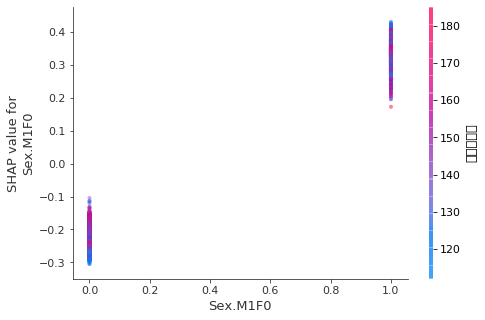

In [139]:
shap.dependence_plot("rank(1)",  shap_values, X_train, interaction_index=9,alpha=0.5)

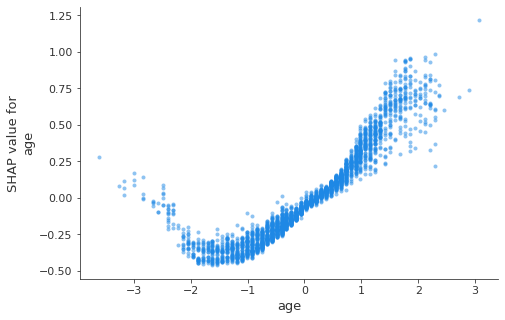

In [172]:
shap.dependence_plot("age",  shap_values_cat, train_norm, alpha=0.5,interaction_index=None)

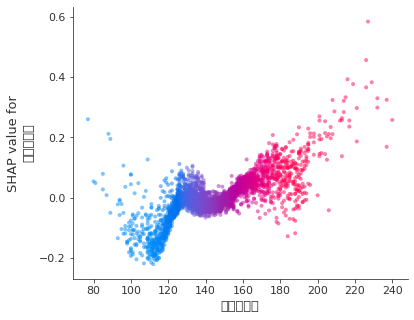

In [141]:
shap.dependence_plot("수축기혈압", shap_values, X_train,alpha=0.5, interaction_index='수축기혈압')

### calc_feature_statistics

In [142]:
res = catmodel2.calc_feature_statistics(train_pool,
                                    feature='age',
                                    plot=True)

In [143]:
train_pool.get_feature_names()

['Sex.M1F0',
 'age',
 'dizziness',
 'Hypertension',
 'Diabetes',
 'smoking',
 'coronary.artery.disease',
 'previous.stroke',
 'Hyperlipidemia',
 '수축기혈압',
 '이완기혈압',
 '맥박']

In [144]:
catmodel.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,20.186833
1,dizziness,16.699283
2,Sex.M1F0,16.355970
3,previous.stroke,9.543331
4,수축기혈압,8.771719
5,맥박,7.756561
6,이완기혈압,6.411417
7,Diabetes,4.126968
8,Hyperlipidemia,3.251330
9,Hypertension,3.056636


### object_importance

In [145]:
# oiindices, oiscores = catmodel.get_object_importance(test_pool, train_pool)

In [90]:
X_train.head()

,Sex.M1F0,age,dizziness,Hypertension,Diabetes,smoking,coronary.artery.disease,previous.stroke,Hyperlipidemia,수축기혈압,이완기혈압,맥박
0,1,49,1,1,0,1,0,0,0,152,94,77
1,0,60,0,1,0,0,0,0,0,169,105,71
2,1,61,0,0,0,0,1,0,0,138,89,67
3,0,58,0,1,1,0,0,1,0,188,109,71
4,0,70,0,0,0,0,0,0,1,131,92,71


In [88]:
shap_values.shape

(3164, 12)

In [92]:
shap_values[:,1].mean()

-0.0010152900548277988

In [102]:
X_train.columns[0]

'Sex.M1F0'

In [110]:
idx=0 #Sex
shap_values[X_train.loc[:,X_train.columns[idx]]==1,idx].mean()

0.32847237622758396

In [112]:
idx=2 #dizziness
shap_values[X_train.loc[:,X_train.columns[idx]]==1,idx].mean()

0.2978889522354113

In [122]:
idx=7 #previous.stroke	
shap_values[X_train.loc[:,X_train.columns[idx]]==1,idx].mean()

0.7431093410300215

In [121]:
idx=1 #age
np.absolute(shap_values[:,idx]).mean()

0.2454586840665177

In [124]:
shdf=pd.DataFrame(shap_values,columns=X_train.columns)

In [126]:
shdf.shape


(3164, 12)

In [127]:
shdf.to_csv(f'/home/hdd1/Projects/dizziness/results/shapvalues_trainset_{shdf.shape[0]}by{shdf.shape[1]}dimension_200428.csv',index=False)

In [26]:
import datetime
import matplotlib.pyplot as plt

def drawDependencePlot(shapvalue,X_train,intvar,alg,hline=0,dirname="ml_200710",setColorbyVar=True):
    date=datetime.datetime.now().strftime("%y%m%d")
    cols={'lr':'#1f77b4','svm':'#ff7f0e','rf':'#2ca02c','cat':'#D62962'}
    if setColorbyVar : 
        col=cols[alg]
    else :
        col='#1E88E5'
    mpl_fig = plt.figure()
    ax = mpl_fig.add_subplot(111)
#     ax.set_ylim(-0.25, 0.8)
    if hline is not None: ax.axhline(y=hline,color='grey')
    shap.dependence_plot(intvar,  shapvalue, X_train, alpha=0.5,  interaction_index=None,color=col,
                         feature_names=display_ftname, show=False,ax=ax )
    plt.savefig(f'/home/hdd1/Projects/dizziness/results/{dirname}/shap_values_{alg}_{intvar}_{date}.jpeg', dpi=600, format='jpeg',
            transparent=False, bbox_inches='tight', pad_inches=.1)

def drawShapPlots(shapvalue,X_train,alg,dirname="ml_200710",isdotplot=False,setColorbyVar=True):
    date=datetime.datetime.now().strftime("%y%m%d")
    if isdotplot:
        shap.summary_plot( shapvalue, X_train, plot_type="dot",feature_names=display_ftname, show=False,plot_size=(7,4.5))
        plt.savefig(f'/home/hdd1/Projects/dizziness/results/{dirname}/shap_values_{alg}_{len(shapvalue)}row_{date}.jpeg', dpi=600, format='jpeg',
            transparent=False, bbox_inches='tight', pad_inches=.1)
    else:
        cols={'lr':'#1f77b4','svm':'#ff7f0e','rf':'#2ca02c','cat':'#D62962'}
        if setColorbyVar : 
            col=cols[alg]
        else :
            col='#1E88E5'
        shap.summary_plot( shapvalue, X_train, plot_type="bar",feature_names=display_ftname, show=False,plot_size=(7,4.5),color=col)
        plt.savefig(f'/home/hdd1/Projects/dizziness/results/{dirname}/shap_values_{alg}_mean_{len(shapvalue)}row_{date}.png', dpi=600, format='png',
            transparent=False, bbox_inches='tight', pad_inches=.1)

### summary_plot

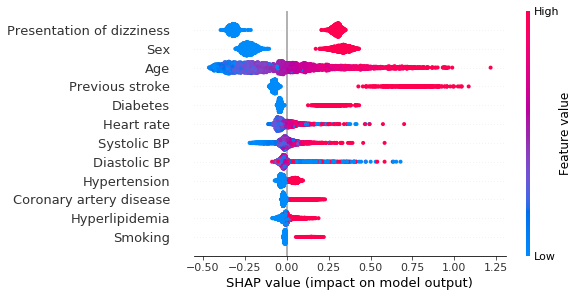

In [102]:
drawShapPlots(shap_values_cat, X_train,"cat",isdotplot=True)

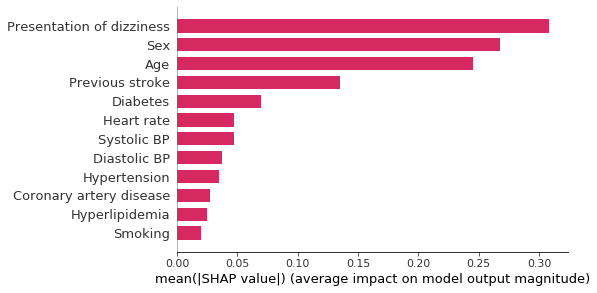

In [115]:
drawShapPlots(shap_values_cat, X_train,"cat",isdotplot=False)

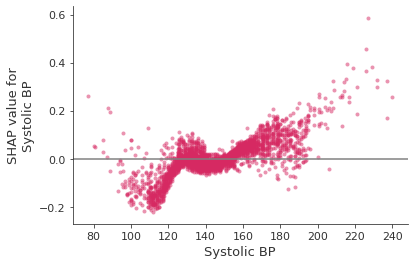

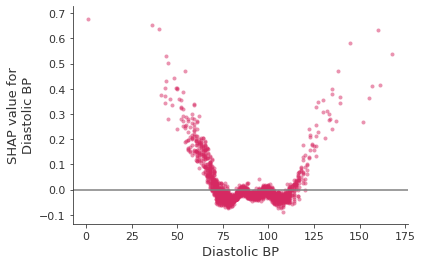

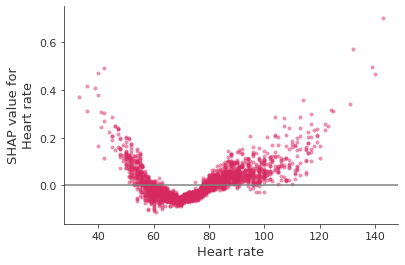

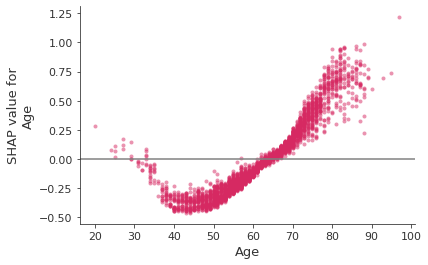

In [116]:
for var in ["Systolic BP", "Diastolic BP","Heart rate","Age"]:
    drawDependencePlot(shap_values_cat, X_train,var,"cat")

In [100]:
shap.summary_plot( shap_values_test, X_test, plot_type="dot",feature_names=display_ftname)

NameError: name 'shap_values_test' is not defined

### Load classifiers

In [12]:
with open("/home/hdd1/Projects/dizziness/results/ml_200527/DatasetsandModels_200528.pkl", 'rb') as input:
    [X_train, X_test, y_train, y_test, clf, svm, grid_rf, gbm_model]  = pickle.load(input)

Trying to unpickle estimator LogisticRegression from version 0.21.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator SVC from version 0.21.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator RandomizedSearchCV from version 0.21.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator DecisionTreeClassifier from version 0.21.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator RandomForestClassifier from version 0.21.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.


### shap of SVM 

In [40]:
explainer_svm = shap.KernelExplainer(svm.predict_proba, train_norm.sample(n=100,random_state=42), link="logit")
shap_values_svm = explainer_svm.shap_values( train_norm)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [59]:
explainer_svm.expected_value

array([ 2.3503861, -2.3503861])

In [41]:
len(shap_values_svm)

2

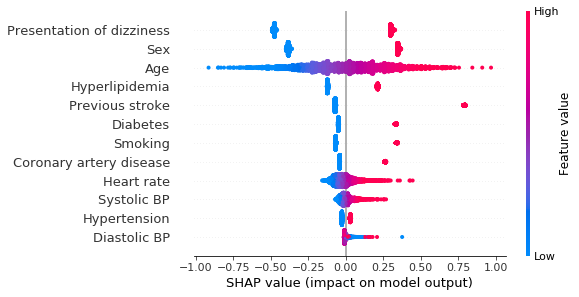

In [42]:
drawShapPlots(shap_values_svm[1], train_norm,"svm",isdotplot=True)

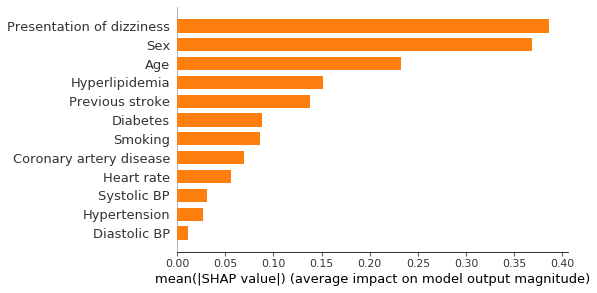

In [43]:
drawShapPlots(shap_values_svm[1],  train_norm,"svm",isdotplot=False)

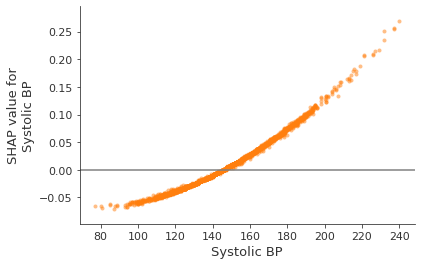

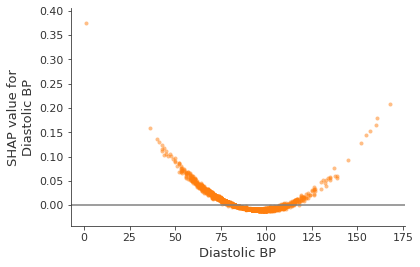

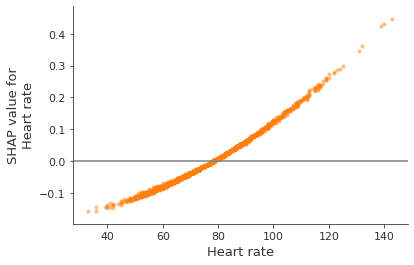

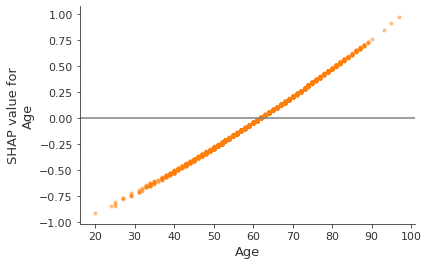

In [44]:
for var in ["Systolic BP", "Diastolic BP","Heart rate","Age"]:
    drawDependencePlot(shap_values_svm[1], X_train,var,"svm")

In [193]:
shap_values_rf[:,0].mean()

-0.009377490148864189

In [216]:
print(shap_values_lr[np.where(X_train.iloc[:,0]==1),0].mean())
print(shap_values_rf[np.where(X_train.iloc[:,0]==1),0].mean())
print(shap_values_cat[np.where(X_train.iloc[:,0]==1),0].mean())

0.5077999072665147
0.04726775272632737
0.32847237622758396


### Logistic regression

In [41]:
shap.initjs()

In [61]:
explainer_lr = shap.LinearExplainer(clf, train_norm, feature_perturbation="interventional")
shap_values_lr = explainer_lr.shap_values(train_norm)

In [62]:
explainer_lr.expected_value

-2.6306120707472376

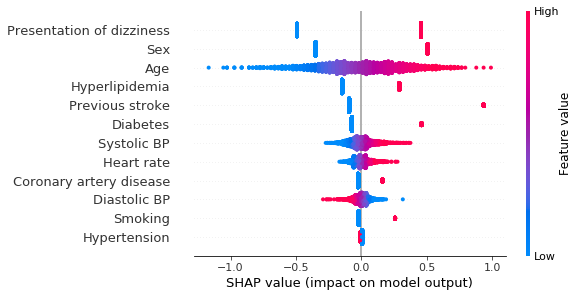

In [87]:
drawShapPlots(shap_values_lr, train_norm,"lr",isdotplot=True)

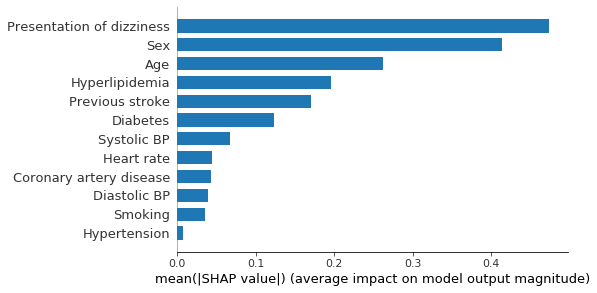

In [88]:
drawShapPlots(shap_values_lr, train_norm,"lr",isdotplot=False)

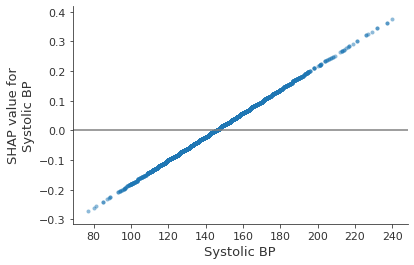

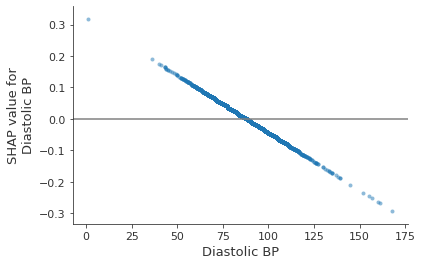

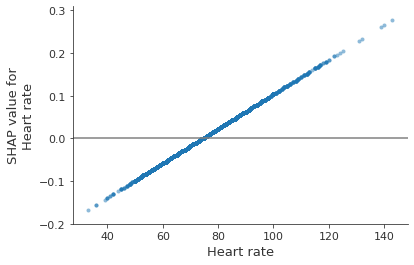

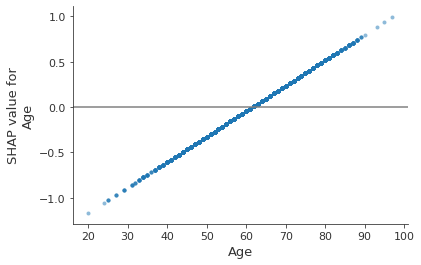

In [182]:
for var in ["Systolic BP", "Diastolic BP","Heart rate","Age"]:
    drawDependencePlot(shap_values_lr, X_train,var,"lr")

### RF

In [13]:
grid_rf.best_params_

{'n_estimators': 500, 'max_depth': 3}

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(class_weight ='balanced',random_state=42,**grid_rf.best_params_)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [57]:
pd.DataFrame(rf.feature_importances_,index=display_ftname).iloc[:,0].sort_values(ascending=False)

Presentation of dizziness    0.256103
Age                          0.188092
Previous stroke              0.160836
Sex                          0.159199
Diabetes                     0.057753
Diastolic BP                 0.045861
Systolic BP                  0.040060
Heart rate                   0.040057
Hypertension                 0.017092
Coronary artery disease      0.016952
Smoking                      0.012134
Hyperlipidemia               0.005861
Name: 0, dtype: float64

In [58]:
explainer_rf_raw = shap.TreeExplainer(rf,X_train,model_output="margin") # For regression models “raw” is the standard output, for binary classification in XGBoost this is the log odds ratio.
shap_values_rf_raw = explainer_rf_raw.shap_values(X_train)[1]

Passing 3164 background samples may lead to slow runtimes. Consider using shap.sample(data, 100) to create a smaller background data set.
100%|===================| 6325/6328 [13:50<00:00]        

In [63]:
explainer_rf_raw.expected_value

array([0.55674134, 0.44325866])

In [79]:
explainer_rf = shap.TreeExplainer(rf) # For regression models “raw” is the standard output, for binary classification in XGBoost this is the log odds ratio.
shap_values_rf = explainer_rf.shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [80]:
explainer_rf.expected_value

array([0.49955395, 0.50044605])

In [24]:
shap_values_rf_raw

array([[ 0.06669265, -0.03438913,  0.07178237, ..., -0.00117304,
        -0.0010937 , -0.00102679],
       [-0.03682416, -0.03023521, -0.06494324, ...,  0.00388083,
        -0.00238094, -0.00295729],
       [ 0.05288671, -0.01440685, -0.07450182, ..., -0.00127355,
        -0.00189819, -0.00263021],
       ...,
       [-0.03577952, -0.03313403, -0.0634648 , ..., -0.00055307,
        -0.00077539, -0.00252182],
       [ 0.0588913 , -0.03016161, -0.07639594, ..., -0.0012577 ,
         0.0017046 ,  0.00453529],
       [-0.03489971,  0.0717042 ,  0.06152515, ...,  0.000778  ,
        -0.00026376, -0.00294149]])

In [33]:
shap_values_rf

array([[ 0.0540678 , -0.04266348,  0.05563916, ..., -0.00314185,
        -0.00383647, -0.00303056],
       [-0.04705351, -0.04020041, -0.08261021, ...,  0.00237848,
        -0.00558451, -0.00506879],
       [ 0.04401384, -0.0222422 , -0.09541925, ..., -0.00277702,
        -0.00526589, -0.00489595],
       ...,
       [-0.04573458, -0.04388654, -0.08081478, ..., -0.00249786,
        -0.0031901 , -0.00459971],
       [ 0.04904524, -0.03696301, -0.09755148, ..., -0.00238763,
        -0.00166137,  0.00176813],
       [-0.04508739,  0.05939781,  0.04804951, ..., -0.00141453,
        -0.00348621, -0.00538289]])

In [22]:
def logit(x):
    return np.log(x/(1-x))

In [23]:
logit(shap_values_rf)

invalid value encountered in log


array([[-2.63850059,         nan, -2.55949885, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ..., -5.5452556 ,
                nan,         nan],
       [-2.88508811,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-2.77120605,         nan,         nan, ...,         nan,
        -6.36687913, -5.38912754],
       [        nan, -2.56067236, -2.72465816, ..., -7.14523786,
                nan,         nan]])

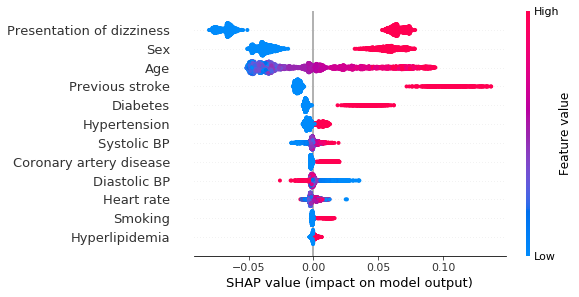

In [34]:
drawShapPlots(shap_values_rf, X_train,"rf",isdotplot=True)

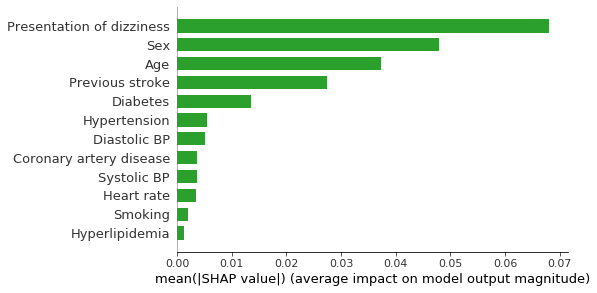

In [36]:
drawShapPlots(shap_values_rf, X_train,"rf",isdotplot=False)

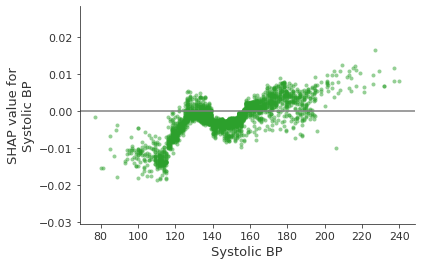

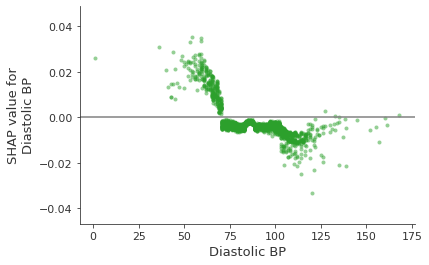

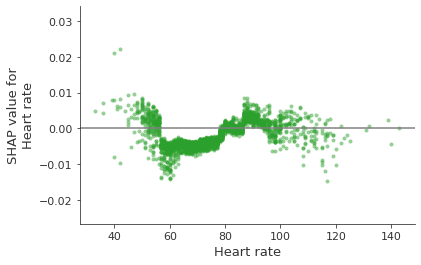

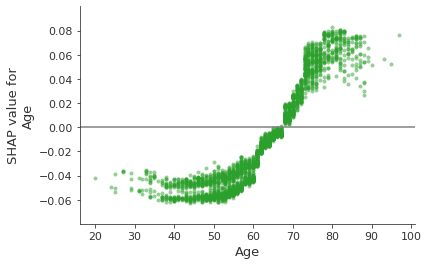

In [37]:
for var in ["Systolic BP", "Diastolic BP","Heart rate","Age"]:
    drawDependencePlot(shap_values_rf, X_train,var,"rf")

In [181]:
pd.DataFrame(shap_values_svm[1],columns=display_ftname).to_csv(f'/home/hdd1/Projects/dizziness/results/ml_200710/shap_values_svm_{len(shap_values_svm[1])}row_200716.csv')
pd.DataFrame(shap_values_rf,columns=display_ftname).to_csv(f'/home/hdd1/Projects/dizziness/results/ml_200710/shap_values_rf_{len(shap_values_rf)}row_200716.csv')
pd.DataFrame(shap_values_cat,columns=display_ftname).to_csv(f'/home/hdd1/Projects/dizziness/results/ml_200710/shap_values_cat_{len(shap_values_cat)}row_200716.csv')
pd.DataFrame(shap_values_lr,columns=display_ftname).to_csv(f'/home/hdd1/Projects/dizziness/results/ml_200710/shap_values_lr_{len(shap_values_lr)}row_200716.csv')

In [78]:
evdf=pd.DataFrame([explainer_lr.expected_value,explainer_svm.expected_value[1],explainer_rf_raw.expected_value[1],explainer_cat.expected_value],index=["lr","svm","rf","cat"],columns=['Expected_value'])
evdf.to_csv(f'/home/hdd1/Projects/dizziness/results/ml_200710/SHAPexplainer_Expected_value.csv')
print(evdf)

     Expected_value
lr        -2.630612
svm       -2.350386
rf         0.443259
cat       -2.488648


## mean shap value plot

In [88]:
def meanAbsSHAP(shapvalue, order=None):
    scat=pd.DataFrame(shapvalue,columns=display_ftname)
    tmp=abs(scat).mean(axis=0)
    if order is not None:
        tmp=tmp.loc[order]
    return tmp
#         tmp=abs(scat).mean(axis=0)/abs(scat).mean(axis=0).sum()

In [175]:
shlr=pd.DataFrame(shap_values_lr,columns=display_ftname)
np.multiply(shlr.iloc[0,:],train_norm.iloc[0,:])

Sex                          0.507800
Age                          0.388650
Presentation of dizziness    0.456781
Hypertension                -0.009297
Diabetes                    -0.000000
Smoking                      0.257962
Coronary artery disease     -0.000000
Previous stroke             -0.000000
Hyperlipidemia              -0.000000
Systolic BP                  0.007701
Diastolic BP                -0.009770
Heart rate                   0.001790
Name: 0, dtype: float64

In [179]:
shlr.iloc[0,:]

Sex                          0.507800
Age                         -0.354429
Presentation of dizziness    0.456781
Hypertension                -0.009297
Diabetes                    -0.071659
Smoking                      0.257962
Coronary artery disease     -0.024688
Previous stroke             -0.093767
Hyperlipidemia              -0.147152
Systolic BP                  0.025955
Diastolic BP                -0.022460
Heart rate                   0.010093
Name: 0, dtype: float64

In [178]:
train_norm.iloc[0,:]

Sex.M1F0                   1.000000
age                       -1.096554
dizziness                  1.000000
Hypertension               1.000000
Diabetes                   0.000000
smoking                    1.000000
coronary.artery.disease    0.000000
previous.stroke            0.000000
Hyperlipidemia             0.000000
수축기혈압                      0.296718
이완기혈압                      0.435007
맥박                         0.177303
Name: 0, dtype: float64

In [89]:
mas_lr=meanAbsSHAP(shap_values_lr).sort_values(ascending=False)

In [108]:
(mas_lr/mas_lr.sum())

Presentation of dizziness    0.252185
Sex                          0.220557
Age                          0.139701
Hyperlipidemia               0.104064
Previous stroke              0.090728
Diabetes                     0.066010
Systolic BP                  0.036142
Heart rate                   0.023847
Coronary artery disease      0.022817
Diastolic BP                 0.021095
Smoking                      0.018920
Hypertension                 0.003935
dtype: float64

In [106]:
mas_svm=meanAbsSHAP(shap_values_svm[1],mas_lr.index)
mas_rf=meanAbsSHAP(shap_values_rf[1],mas_lr.index)

In [ ]:
mas_cat=meanAbsSHAP(shap_values_cat,mas_lr.index)

In [92]:
mas_cat

Presentation of dizziness    0.308395
Sex                          0.267457
Age                          0.245459
Hyperlipidemia               0.024962
Previous stroke              0.134716
Diabetes                     0.069960
Systolic BP                  0.047450
Heart rate                   0.047493
Coronary artery disease      0.027067
Diastolic BP                 0.037657
Smoking                      0.019974
Hypertension                 0.034740
dtype: float64

In [93]:
shap_values_cat.shape

(3164, 12)

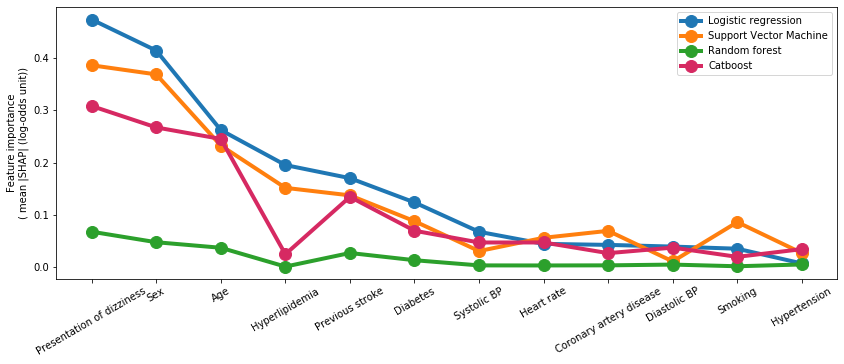

In [120]:
import datetime
import matplotlib.pyplot as plt

cols={'lr':'#1f77b4','svm':'#ff7f0e','rf':'#2ca02c','cat':'#D62962'}
date=datetime.datetime.now().strftime("%y%m%d")

mpl_fig = plt.figure(figsize=(14,5))
plt.plot(mas_lr.index, mas_lr[mas_lr.index], marker='o', markerfacecolor=cols['lr'], markersize=12, color=cols['lr'], linewidth=4,label='Logistic regression')
plt.plot(mas_lr.index, mas_svm[mas_lr.index], marker='o', markerfacecolor=cols['svm'], markersize=12, color=cols['svm'], linewidth=4,label='Support Vector Machine')
plt.plot(mas_lr.index, mas_rf[mas_lr.index], marker='o', markerfacecolor=cols['rf'], markersize=12, color=cols['rf'], linewidth=4,label='Random forest')
plt.plot(mas_lr.index, mas_cat[mas_lr.index], marker='o', markerfacecolor=cols['cat'], markersize=12, color=cols['cat'], linewidth=4,label='Catboost')
plt.ylabel('Feature importance\n( mean |SHAP| (log-odds unit))')
plt.xticks(rotation=30)
plt.legend()
plt.savefig(f'/home/hdd1/Projects/dizziness/results/ml_200710/meanSHAPvalues_{date}.jpeg', dpi=600, format='jpeg',
            transparent=False, bbox_inches='tight', pad_inches=.1)

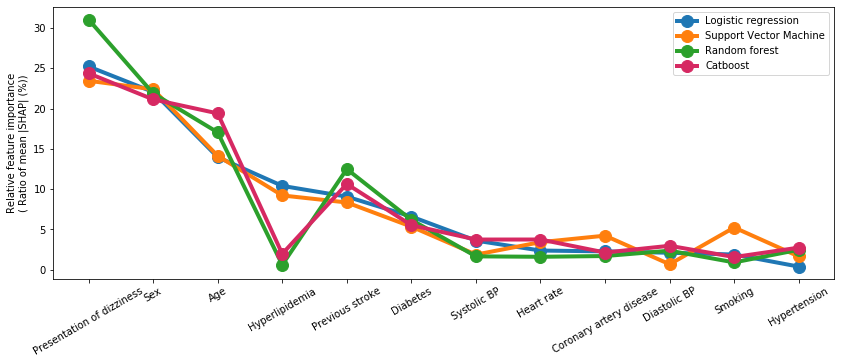

In [121]:
date=datetime.datetime.now().strftime("%y%m%d")

mpl_fig = plt.figure(figsize=(14,5))
plt.plot(mas_lr.index, 100*(mas_lr/mas_lr.sum())[mas_lr.index], marker='o', markerfacecolor=cols['lr'], markersize=12, color=cols['lr'], linewidth=4,label='Logistic regression')
plt.plot(mas_lr.index, 100*(mas_svm/mas_svm.sum())[mas_lr.index], marker='o', markerfacecolor=cols['svm'], markersize=12, color=cols['svm'], linewidth=4,label='Support Vector Machine')
plt.plot(mas_lr.index, 100*(mas_rf/mas_rf.sum())[mas_lr.index], marker='o', markerfacecolor=cols['rf'], markersize=12, color=cols['rf'], linewidth=4,label='Random forest')
plt.plot(mas_lr.index, 100*(mas_cat/mas_cat.sum())[mas_lr.index], marker='o', markerfacecolor=cols['cat'], markersize=12, color=cols['cat'], linewidth=4,label='Catboost')
plt.xticks(rotation=30)
plt.ylabel('Relative feature importance\n( Ratio of mean |SHAP| (%))')
plt.legend()
plt.savefig(f'/home/hdd1/Projects/dizziness/results/ml_200710/Relative_meanSHAPvalues_{date}.jpeg', dpi=600, format='jpeg',
            transparent=False, bbox_inches='tight', pad_inches=.1)

In [190]:
def f(x):
    return np.log(x/(1-x))
def finv(x):
    return 1/(1+np.exp(-x))

In [257]:
finv(shap_values_cat.sum(axis=1)+explainer_cat.expected_value)

array([0.10870015, 0.03729646, 0.06572329, ..., 0.03659577, 0.05695595,
       0.11082259])

In [259]:
predictions_probs_gbm_train[:,1]

array([0.10870015, 0.03729646, 0.06572329, ..., 0.03659577, 0.05695595,
       0.11082259])

In [124]:
X_train['Hyperlipidemia'].value_counts()

0    2102
1    1062
Name: Hyperlipidemia, dtype: int64

In [185]:
pd.DataFrame(shap_values_cat,columns=display_ftname).head()

,Sex,Age,Presentation of dizziness,Hypertension,Diabetes,Smoking,Coronary artery disease,Previous stroke,Hyperlipidemia,Systolic BP,Diastolic BP,Heart rate
0,0.360340,-0.283929,0.314189,0.002430,-0.043864,0.145103,-0.011259,-0.069688,-0.000015,0.002454,-0.013584,-0.017616
1,-0.230427,-0.101401,-0.312987,0.065251,-0.045698,-0.012369,-0.019183,-0.072403,-0.014904,0.060748,-0.019339,-0.059487
2,0.311006,-0.053720,-0.339739,-0.006663,-0.029983,-0.009391,0.137031,-0.079215,-0.001705,-0.026101,-0.021090,-0.046102
3,-0.224595,-0.044363,-0.296932,0.068002,0.312433,-0.010636,-0.013513,0.775570,-0.033867,0.064829,-0.021638,-0.058564
4,-0.198371,0.268170,-0.301130,-0.043185,-0.037019,-0.010176,-0.018846,-0.073600,0.035200,0.009597,-0.018650,-0.057925


In [187]:
shap_values_cat[0,:].sum()

0.38456047698257473

In [191]:
f(predictions_probs_gbm_train[0,1])

-2.104087768198613

In [182]:
predictions_probs_gbm_train

array([[0.89129985, 0.10870015],
       [0.96270354, 0.03729646],
       [0.93427671, 0.06572329],
       ...,
       [0.96340423, 0.03659577],
       [0.94304405, 0.05695595],
       [0.88917741, 0.11082259]])

In [163]:
np.median(y_ft[(X_ft[:,0]-1)<.01])

-0.14715182844446775

In [162]:
np.median(y_ft[(X_ft[:,0]-0)<.01])

-0.14715182844446775

[<matplotlib.lines.Line2D at 0x7fb23431c6a0>]

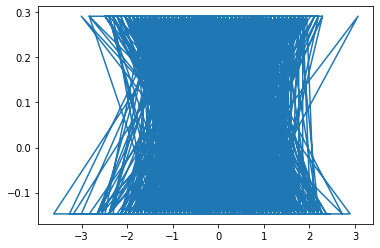

In [147]:
plt.plot(X_ft, y_ft)

In [166]:
display_ftname

['Sex',
 'Age',
 'Presentation of dizziness',
 'Hypertension',
 'Diabetes',
 'Smoking',
 'Coronary artery disease',
 'Previous stroke',
 'Hyperlipidemia',
 'Systolic BP',
 'Diastolic BP',
 'Heart rate']

In [167]:
from sklearn.linear_model import LinearRegression
continous_index=np.where(~pd.Series(range(len(display_ftname))).isin(train_pool.get_cat_feature_indices()))[0]
for i in continous_index:
    print(i)
    print(display_ftname[i])
    X_ft=np.array(train_norm.iloc[:,1]).reshape( -1,1)
    y_ft=shap_values_lr[:,i]
    reg = LinearRegression().fit(X_ft, y_ft)
    print(reg.score(X_ft, y_ft))

    print(reg.coef_)

    print(reg.intercept_)


1
Age
1.0
[0.32322087]
7.45310622396303e-17
9
Systolic BP
0.029301371107256502
[0.01497337]
4.092140924441e-18
10
Diastolic BP
0.02464101026897758
[0.00810496]
2.268628821160295e-19
11
Heart rate
0.004573342101179323
[-0.00384974]
-6.562566548597828e-20


## mean shap value

In [1]:
import pandas as pd

In [2]:
shdf=pd.read_csv(f'/home/hdd1/Projects/dizziness/results/shapvalues_trainset_3164by12dimension_200428.csv')

In [3]:
shdf.head()

,Sex.M1F0,age,dizziness,Hypertension,Diabetes,smoking,coronary.artery.disease,previous.stroke,Hyperlipidemia,수축기혈압,이완기혈압,맥박
0,0.360340,-0.283929,0.314189,0.002430,-0.043864,0.145103,-0.011259,-0.069688,-0.000015,0.002454,-0.013584,-0.017616
1,-0.230427,-0.101401,-0.312987,0.065251,-0.045698,-0.012369,-0.019183,-0.072403,-0.014904,0.060748,-0.019339,-0.059487
2,0.311006,-0.053720,-0.339739,-0.006663,-0.029983,-0.009391,0.137031,-0.079215,-0.001705,-0.026101,-0.021090,-0.046102
3,-0.224595,-0.044363,-0.296932,0.068002,0.312433,-0.010636,-0.013513,0.775570,-0.033867,0.064829,-0.021638,-0.058564
4,-0.198371,0.268170,-0.301130,-0.043185,-0.037019,-0.010176,-0.018846,-0.073600,0.035200,0.009597,-0.018650,-0.057925


In [11]:
print(f"{shdf['dizziness'].abs().mean():.3f}")

0.308


In [12]:
print(f"{shdf['Sex.M1F0'].abs().mean():.3f}")

0.267


In [13]:
print(f"{shdf['age'].abs().mean():.3f}")

0.245


In [14]:
print(f"{shdf['previous.stroke'].abs().mean():.3f}")

0.135
